# LDA using Gensim

## Topic 6
### 수중활동 교육 프로그램 등 안전 관련 시나리오 분석

In [6]:
import sys
import os

sys.path.insert(0, '../')
import preprocess_csv as preprocess
import topic_modeling as lda

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [9]:
df1_path = '../data/topic6/risk_diving.csv'
df2_path = '../data/topic6/safety_diving.csv'
dst_path = '../data/topic6'; dst_name='/diving*.csv'
df = preprocess.remove_dup(df1_path, df2_path, dst_path, dst_name)
print("중복을 제거한 총 논문의 개수:", len(df))

# abstract만 추출
papers = preprocess.extract_text(df=df)

중복을 제거한 총 논문의 개수: 860


In [10]:
# token화
texts = [lda.tokenizer(paper) for paper in papers]

# 토큰화 결과로부터 dictionary 생성
dictionary = Dictionary(texts)
print('Number of initial unique words in documents:', len(dictionary))

# 문서 빈도수가 너무 적거나 높은 문서를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)
print("Number of unique words after removing rare and common words:", len(dictionary))

# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in texts]
print(f'Number of unique tokens: {len(dictionary)}')
print(f'Number of documents: {len(corpus)}')

Number of initial unique words in documents: 9459
Number of unique words after removing rare and common words: 2000
Number of unique tokens: 2000
Number of documents: 860


num_topics: 6, perplexity: -7.178, coherence: -1.415
num_topics: 7, perplexity: -7.202, coherence: -1.412
num_topics: 8, perplexity: -7.227, coherence: -1.399
num_topics: 9, perplexity: -7.250, coherence: -1.425
num_topics: 10, perplexity: -7.283, coherence: -1.473
num_topics: 11, perplexity: -7.317, coherence: -1.467
num_topics: 12, perplexity: -7.349, coherence: -1.478
num_topics: 13, perplexity: -7.378, coherence: -1.446
num_topics: 14, perplexity: -7.410, coherence: -1.429
num_topics: 15, perplexity: -7.425, coherence: -1.507


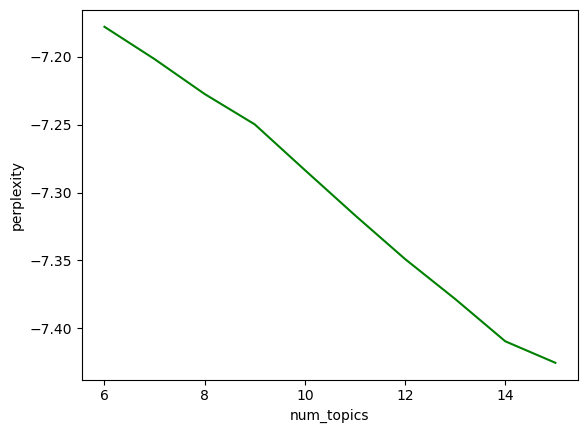

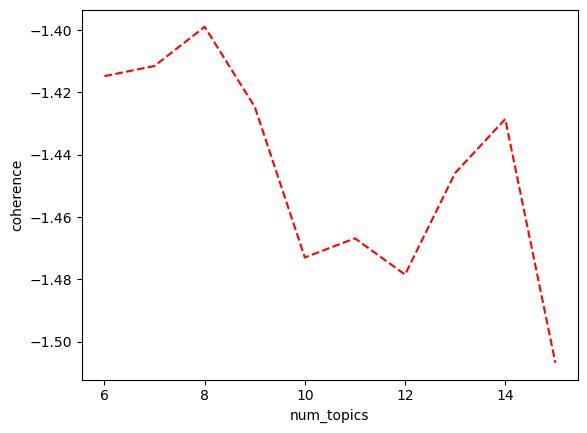

In [11]:
per_value, coh_value = lda.show_coherence(corpus, dictionary, start=6, end=15)

In [13]:
best_p_topic = per_value.index(min(per_value)) + 6
best_c_topic = coh_value.index(max(coh_value)) + 6
print("best topic num in perplexity:", best_p_topic)
print("best topic num in coherence:", best_c_topic)

best topic num in perplexity: 15
best topic num in coherence: 8


In [24]:
# choose num_topics according to the perplexity
passes = 5
%time model1 = LdaModel(corpus=corpus, id2word=dictionary, \
                       passes=passes, num_topics=best_p_topic, \
                       random_state=7)# LDA 모형을 pyLDAvis 객체에 전달
lda_vis1 = gensimvis.prepare(model1, corpus, dictionary)
lda_vis1

CPU times: user 6.31 s, sys: 69.7 ms, total: 6.38 s
Wall time: 6.76 s


/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.087150 -0.004797       1        1  14.574456
14    -0.058104  0.094733       2        1  10.185103
12     0.050480 -0.063310       3        1   9.009586
13     0.052577 -0.051444       4        1   8.481827
9      0.007967 -0.022070       5        1   7.950303
3     -0.027706  0.011205       6        1   7.184021
11    -0.051421 -0.047874       7        1   6.532465
6     -0.077814 -0.017313       8        1   6.181824
0      0.133473  0.001760       9        1   6.156617
1     -0.030566  0.024453      10        1   5.623608
8      0.067317  0.002331      11        1   4.976998
10    -0.041991 -0.037802      12        1   4.634128
2      0.013163 -0.105209      13        1   3.461547
5     -0.044324  0.089910      14        1   3.198975
4      0.094099  0.125428      15        1   1.848541, topic_info=          Term         Freq        Total Category  logprob  loglift
67      injuri   542.000000   542.000000  Default  30.0000  30.0000
173    patient   615.000000   615.000000  Default  29.0000  29.0000
43       diver  1467.000000  1467.000000  Default  28.0000  28.0000
1298       pfo   229.000000   229.000000  Default  27.0000  27.0000
158       hbot   233.000000   233.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
127     assess     8.552599   338.812165  Topic15  -5.4020   0.3116
300    increas     8.678440   623.420597  Topic15  -5.3874  -0.2836
248   concentr     8.025820   107.675128  Topic15  -5.4656   1.3943
469       test     8.148519   359.706845  Topic15  -5.4504   0.2033
222        may     8.122117   527.653363  Topic15  -5.4536  -0.1831

[987 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
551       1  0.069668        000
551       2  0.017417        000
551       3  0.191586        000
551       4  0.034834        000
551       5  0.139335        000
...     ...       ...        ...
1172     11  0.050298    younger
1172     14  0.100595    younger
852       2  0.845130  zebrafish
852       6  0.068524  zebrafish
852      15  0.045683  zebrafish

[5538 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 15, 13, 14, 10, 4, 12, 7, 1, 2, 9, 11, 3, 6, 5])

In [14]:
# choose num_topics according to the coherence
passes = 5
%time model2 = LdaModel(corpus=corpus, id2word=dictionary, \
                       passes=passes, num_topics=best_c_topic, \
                       random_state=7)# LDA 모형을 pyLDAvis 객체에 전달
lda_vis2 = gensimvis.prepare(model2, corpus, dictionary)
lda_vis2

CPU times: user 6.15 s, sys: 64.4 ms, total: 6.21 s
Wall time: 6.81 s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.055558  0.033903       1        1  22.767180
6      0.074636 -0.006213       2        1  13.850263
0     -0.046596 -0.105242       3        1  13.292744
2      0.015475 -0.055595       4        1  13.022182
3      0.020723  0.028197       5        1  12.100785
1      0.022175  0.000182       6        1  11.350090
4     -0.119717  0.038170       7        1   7.248455
5     -0.022255  0.066597       8        1   6.368300, topic_info=          Term         Freq        Total Category  logprob  loglift
67      injuri   568.000000   568.000000  Default  30.0000  30.0000
707      sport   265.000000   265.000000  Default  29.0000  29.0000
12      athlet   194.000000   194.000000  Default  28.0000  28.0000
173    patient   602.000000   602.000000  Default  27.0000  27.0000
43       diver  1451.000000  1451.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
469       test    23.032853   347.933369   Topic8  -5.6482   0.0387
173    patient    23.667513   602.252503   Topic8  -5.6211  -0.4827
191  treatment    22.527028   349.390160   Topic8  -5.6704   0.0124
37     decreas    22.033199   181.117038   Topic8  -5.6926   0.6472
169      medic    22.063083   397.949050   Topic8  -5.6913  -0.1386

[566 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1797      1  0.158200       0001
1797      2  0.237300       0001
1797      3  0.039550       0001
1797      6  0.474600       0001
1797      7  0.079100       0001
...     ...       ...        ...
1172      8  0.098578    younger
852       1  0.024355  zebrafish
852       5  0.706291  zebrafish
852       6  0.024355  zebrafish
852       7  0.243548  zebrafish

[2415 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 7, 1, 3, 4, 2, 5, 6])

In [23]:
# choose num_topics manually
passes = 5
%time model3 = LdaModel(corpus=corpus, id2word=dictionary, \
                       passes=passes, num_topics=10, \
                       random_state=7)# LDA 모형을 pyLDAvis 객체에 전달
lda_vis3 = gensimvis.prepare(model3, corpus, dictionary)
lda_vis3

CPU times: user 7.52 s, sys: 247 ms, total: 7.77 s
Wall time: 9.05 s


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.070231 -0.008365       1        1  19.398610
9      0.016837  0.047989       2        1  13.227960
8     -0.042069  0.025112       3        1  11.072131
2      0.001005 -0.015096       4        1   9.568350
3      0.026416 -0.029939       5        1   9.322092
1      0.032208  0.006832       6        1   8.999036
0     -0.087104  0.101275       7        1   8.993224
6      0.087479  0.032572       8        1   8.881915
5      0.009436 -0.088474       9        1   5.462880
4     -0.114440 -0.071906      10        1   5.073803, topic_info=        Term         Freq        Total Category  logprob  loglift
67    injuri   552.000000   552.000000  Default  30.0000  30.0000
173  patient   603.000000   603.000000  Default  29.0000  29.0000
707    sport   258.000000   258.000000  Default  28.0000  28.0000
12    athlet   189.000000   189.000000  Default  27.0000  27.0000
43     diver  1456.000000  1456.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
143   effect    27.652287   437.589354  Topic10  -5.2382   0.2195
176  present    24.159136   266.466053  Topic10  -5.3733   0.5805
181    relat    23.638306   341.065540  Topic10  -5.3951   0.3119
791    model    22.186481   237.205018  Topic10  -5.4584   0.6116
173  patient    20.236315   603.161800  Topic10  -5.5504  -0.4136

[685 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
551       1  0.101724        000
551       2  0.135631        000
551       3  0.525572        000
551       5  0.016954        000
551       6  0.050862        000
...     ...       ...        ...
585       8  0.050088    zealand
852       1  0.024610  zebrafish
852       2  0.369143  zebrafish
852       5  0.566019  zebrafish
852      10  0.024610  zebrafish

[3291 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 10, 9, 3, 4, 2, 1, 7, 6, 5])

/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


choose best model

In [22]:
best_model = model3
best_lda = lda_vis3
pyLDAvis.save_html(best_lda, '../figure/topic6/topic6_TopicModeling.html')

/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/shimgahyeon/opt/anaconda3/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


#### print_topics()
각 토픽의 상위 비중 단어 확인  
* num_topics: 매개변수로 보고 싶은 토픽의 수
* num_words: 각 토픽의 상위 단어 수 지정  

보통 num_words만 지정한다

In [29]:
best_model.print_topics(num_words=10)

[(0,
  '0.026*"injuri" + 0.013*"sport" + 0.012*"athlet" + 0.012*"year" + 0.009*"activ" + 0.008*"associ" + 0.007*"particip" + 0.007*"factor" + 0.007*"age" + 0.007*"patient"'),
 (1,
  '0.013*"patient" + 0.008*"treatment" + 0.007*"method" + 0.006*"assess" + 0.006*"grade" + 0.006*"bubbl" + 0.006*"perform" + 0.005*"decompress" + 0.005*"hbot" + 0.005*"oxygen"'),
 (2,
  '0.012*"scuba" + 0.010*"diver" + 0.009*"review" + 0.008*"report" + 0.008*"medic" + 0.008*"includ" + 0.008*"health" + 0.007*"relat" + 0.007*"safeti" + 0.007*"identifi"'),
 (3,
  '0.016*"patient" + 0.011*"diver" + 0.010*"hbot" + 0.008*"test" + 0.008*"case" + 0.007*"treatment" + 0.007*"decompress" + 0.007*"may" + 0.007*"effect" + 0.006*"water"'),
 (4,
  '0.009*"whale" + 0.009*"drown" + 0.008*"activ" + 0.007*"predat" + 0.007*"associ" + 0.006*"time" + 0.006*"speci" + 0.006*"marin" + 0.006*"behaviour" + 0.006*"factor"'),
 (5,
  '0.010*"individu" + 0.007*"increas" + 0.006*"forag" + 0.005*"respons" + 0.005*"diver" + 0.005*"heart" + 0.

#### get_document_topics()  
인수로 넘긴 문서들에 대해 토픽 분포 반환
* corpus: BOW로 변환된 카운트 벡터
* minimum_probability: 보여질 토픽의 비중에 대한 임계값. 즉, minimum_probability 이상의 토픽만 출력

In [30]:
print("topic distribution of the first document:", best_model.get_document_topics(corpus)[100])

topic distribution of the first document: [(0, 0.8113181), (4, 0.18448444)]
